# EmlakJet  Web Scraping and Saving data

Merhaba Arkadaşlar bugün sizinle birlikte Weri çekme yapacağız ve Çektiğmizi veriler ile Price Değerini Regression Modelleme yaparak yüksek bir oran almaya çalışacağız 

bziden başta zingat.com dan veri çekilmesi istendi 
ama zingatta 403 request hatası aldığım için bende mevcut emlak sitelerinden birtanesini hedef aldım 'EmlakJet' 

veri çekme işlemi başarılı oldum ve çektiğim verileri datafream a dönüştürdüm , bu dönüşüm ile de modelleme yaparak yüksek bir başarı 
elde etmeye çalışacağız , saygılarımla . 

<img src='https://m.media-amazon.com/images/I/51qHhCpE58L._AC_UF1000,1000_QL80_.jpg'>

# 1...50 kadar olan sayfanın ana linkleri 

In [53]:
def get_listing_urls(start_page=1, end_page=50):
    """Belirtilen sayfa aralığındaki ilan sayfalarının URL'lerini döner."""
    urls = []

    for page_num in range(start_page, end_page + 1):
        url = f'https://www.emlakjet.com/satilik-konut/istanbul/{page_num}/'
        urls.append(url)

    return urls

# 1-50. sayfaların URL'lerini alalım
main_url = get_listing_urls()
print(main_url)


['https://www.emlakjet.com/satilik-konut/istanbul/1/', 'https://www.emlakjet.com/satilik-konut/istanbul/2/', 'https://www.emlakjet.com/satilik-konut/istanbul/3/', 'https://www.emlakjet.com/satilik-konut/istanbul/4/', 'https://www.emlakjet.com/satilik-konut/istanbul/5/', 'https://www.emlakjet.com/satilik-konut/istanbul/6/', 'https://www.emlakjet.com/satilik-konut/istanbul/7/', 'https://www.emlakjet.com/satilik-konut/istanbul/8/', 'https://www.emlakjet.com/satilik-konut/istanbul/9/', 'https://www.emlakjet.com/satilik-konut/istanbul/10/', 'https://www.emlakjet.com/satilik-konut/istanbul/11/', 'https://www.emlakjet.com/satilik-konut/istanbul/12/', 'https://www.emlakjet.com/satilik-konut/istanbul/13/', 'https://www.emlakjet.com/satilik-konut/istanbul/14/', 'https://www.emlakjet.com/satilik-konut/istanbul/15/', 'https://www.emlakjet.com/satilik-konut/istanbul/16/', 'https://www.emlakjet.com/satilik-konut/istanbul/17/', 'https://www.emlakjet.com/satilik-konut/istanbul/18/', 'https://www.emlak

In [54]:
# Hedef manJWF

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# URL'leri içeren liste
links = [f'https://www.emlakjet.com/satilik-konut/istanbul/{i}/' for i in range(1, 51)]

# Boş liste oluşturuluyor
data = []

# URL'lere istek gönder ve veri çek
for url in links:
    try:
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        
        # Bilgiyi bul
        listings = soup.find_all('div', attrs={'class': 'manJWF'})
        
        # Her bir ilan için bilgileri al
        for listing in listings:
            # Dinamik veri-test-selector değerlerini çekmek için
            title = listing.find('div', attrs={'data-ej-label': 'link_item'}).find('h3').text.strip() if listing.find('div', attrs={'data-ej-label': 'link_item'}) else 'N/A'
            category = listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-category-')}).text.strip() if listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-category-')}) else 'N/A'
            room_count = listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-room-count-')}).text.strip() if listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-room-count-')}) else 'N/A'
            floor = listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-floor-number-')}).text.strip() if listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-floor-number-')}) else 'N/A'
            area = listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-gross-square-')}).text.strip() if listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-gross-square-')}) else 'N/A'
            updated_at = listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-updated-at-')}).text.strip() if listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-property-updated-at-')}) else 'N/A'
            price = listing.find('p', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-price-')}).text.strip() if listing.find('p', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-price-')}) else 'N/A'
            location = listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-location-')}).text.strip() if listing.find('span', attrs={'data-test-selector': lambda x: x and x.startswith('listing-item-location-')}) else 'N/A'
            
            # Verileri listeye ekle
            data.append({
                'Title': title,
                'Category': category,
                'Room Count': room_count,
                'Floor': floor,
                'Area': area,
                'Updated At': updated_at,
                'Price': price,
                'Location': location
            })
            
        # Sayfa başına 1 saniyelik bekleme süresi ekleyin
        time.sleep(1)
    
    except Exception as e:
        print(f"Error processing {url}: {e}")

# DataFrame oluştur
df = pd.DataFrame(data)

# DataFrame'i görüntüle
df.head()

,Title,Category,Room Count,Floor,Area,Updated At,Price,Location
0,BU DÖNEMI IYI DEĞERLENDIRMEK GEREK DAIRE KALMADI,homeDaire,weekend2+1,layersYüksek giriş,texture95 m2,event21 Ağustos,1.390.000 TL,İstanbul - Esenyurt - Selahaddin Eyyubi Mh.
1,YILDIRIM MAHALLESİNDE YERDEN ISITMALI ULTRA LÜ...,homeDaire,weekend2+1,layersBahçe katı,texture90 m2,event21 Ağustos,3.650.000 TL,İstanbul - Bayrampaşa - Yıldırım Mh.
2,YILDIRIM MAHALLESİNDE 2+1 90m2 YERDEN ISITMALI...,homeDaire,weekend2+1,layersYüksek giriş,texture90 m2,event21 Ağustos,5.650.000 TL,İstanbul - Bayrampaşa - Yıldırım Mh.
3,Satılık Yatırımlık Dublex,homeDaire,weekend2+1,layers4. Kat,texture120 m2,event20 Ağustos,3.000.000 TL,İstanbul - Çatalca - Ferhatpaşa Mh.
4,SANCAKTEPE EYÜPSULTAN MAH. ÇOK KULLANIŞLI 115 ...,homeDaire,weekend3+1,layers1. Kat,texture115 m2,event20 Ağustos,3.840.000 TL,İstanbul - Sancaktepe - Eyüp Sultan Mh.


In [56]:
df.to_csv('emlakjet_with_Price.csv')

In [57]:
df.shape

(1500, 8)

In [58]:
df.isnull().sum()

Title         0
Category      0
Room Count    0
Floor         0
Area          0
Updated At    0
Price         0
Location      0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       1500 non-null   object
 1   Category    1500 non-null   object
 2   Room Count  1500 non-null   object
 3   Floor       1500 non-null   object
 4   Area        1500 non-null   object
 5   Updated At  1500 non-null   object
 6   Price       1500 non-null   object
 7   Location    1500 non-null   object
dtypes: object(8)
memory usage: 93.9+ KB


<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIEzcVBmj0CtWuH3nsy4dnC_4SDoYzK1FJuU9WMyL2ReIWuSP7aDQB0AS2YhsYZhL4ETw&usqp=CAU'>

# EDA 
## Preprocessing 

In [60]:
df2=df.copy()
df=df2.copy()

In [61]:
# ' TL' kısmını kaldır
df['Price'] = df['Price'].replace({' TL': ''}, regex=True)

# ',' karakterlerini kaldır ve '.' karakterini binlik ayracı olarak kaldır
df['Price'] = df['Price'].replace({',': ''}, regex=True)

# Binlik ayracı olarak kullanılan '.' karakterini kaldır
df['Price'] = df['Price'].replace({'\.': ''}, regex=True)

# String değerleri float'a dönüştür
df['Price'] = df['Price'].astype(int)

In [62]:
df['Room Count'].unique()

array(['weekend2+1', 'weekend3+1', 'weekend1+1', 'weekend1 Oda',
       'weekend2+2', 'weekend5+1', 'weekend4+1', 'weekendStüdyo',
       'weekend4+2', 'weekend3+2', 'weekend5+2', 'weekend4.5+1',
       'weekend7+1', 'weekend6+2', 'weekend8+2', 'weekend6+1',
       'weekend2.5+1', 'weekend8+1', 'weekend6+3', 'weekend5+3',
       'weekend7+2', 'weekend3+0', 'weekend9+ Oda', 'weekend4+0',
       'weekend3.5+1', 'weekend1.5+1'], dtype=object)

In [63]:
df['Room Count'] = df['Room Count'].str.replace('weekend', '', regex=False)

In [64]:
df['Room Count'].unique()

array(['2+1', '3+1', '1+1', '1 Oda', '2+2', '5+1', '4+1', 'Stüdyo', '4+2',
       '3+2', '5+2', '4.5+1', '7+1', '6+2', '8+2', '6+1', '2.5+1', '8+1',
       '6+3', '5+3', '7+2', '3+0', '9+ Oda', '4+0', '3.5+1', '1.5+1'],
      dtype=object)

In [65]:
df['Room Count'] = df['Room Count'].str.replace('Oda', '', regex=False)

In [66]:
df['Room Count'].unique()

array(['2+1', '3+1', '1+1', '1 ', '2+2', '5+1', '4+1', 'Stüdyo', '4+2',
       '3+2', '5+2', '4.5+1', '7+1', '6+2', '8+2', '6+1', '2.5+1', '8+1',
       '6+3', '5+3', '7+2', '3+0', '9+ ', '4+0', '3.5+1', '1.5+1'],
      dtype=object)

In [67]:
df['Room Count'] = df['Room Count'].str.replace('Stüdyo', '2', regex=False) # bir çeşit otel tipi oda demek genelde 1+0 ve ya 1+1 olaraka yapılır 

In [68]:
df['Room Count'].unique()

array(['2+1', '3+1', '1+1', '1 ', '2+2', '5+1', '4+1', '2', '4+2', '3+2',
       '5+2', '4.5+1', '7+1', '6+2', '8+2', '6+1', '2.5+1', '8+1', '6+3',
       '5+3', '7+2', '3+0', '9+ ', '4+0', '3.5+1', '1.5+1'], dtype=object)

In [69]:
# Fonksiyon tanımlama: '2+1' gibi değerleri toplama
def sum_room_count(value):
    # Boşlukları temizle
    value = value.strip()
    # '+' karakteri varsa ayır
    if '+' in value:
        parts = value.split('+')
        # Her iki parçayı sayıya çevirip toplama
        try:
            return str(float(parts[0]) + float(parts[1]))
        except ValueError:
            return value  # Eğer sayıya dönüştürülemiyorsa orijinal değeri döndür
    else:
        return value  # Eğer '+' yoksa orijinal değeri döndür

# 'Room Count' sütununda fonksiyonu uygulama
df['Room Count'] = df['Room Count'].apply(sum_room_count)


In [70]:
df['Room Count'].unique()

array(['3.0', '4.0', '2.0', '1', '6.0', '5.0', '2', '7.0', '5.5', '8.0',
       '10.0', '3.5', '9.0', '9+', '4.5', '2.5'], dtype=object)

In [71]:
df['Room Count'] = df['Room Count'].str.replace('+', '', regex=False)
df['Room Count'] = df['Room Count'].str.replace('0', '', regex=False)
df['Room Count'] = df['Room Count'].str.replace('.', ',', regex=False)

In [72]:
df['Room Count'].unique()

array(['3,', '4,', '2,', '1', '6,', '5,', '2', '7,', '5,5', '8,', '1,',
       '3,5', '9,', '9', '4,5', '2,5'], dtype=object)

In [73]:
# Virgülleri noktaya çevir ve sonundaki virgülleri temizle,
import numpy as np
df['Room Count'] = df['Room Count'].str.replace(',', '.', regex=False).str.strip(',')

# Ondalıklı sayıları +1 yap
def adjust_room_count(value):
    try:
        number = float(value)
        if '.' in value:
            return np.ceil(number)  # Ondalıklı sayıları yukarı yuvarla
        return number
    except ValueError:
        return np.nan

df['Room Count'] = df['Room Count'].apply(adjust_room_count).astype(int)

In [74]:
df['Room Count'].unique()  # sonunda 

array([3, 4, 2, 1, 6, 5, 7, 8, 9])

In [75]:
df['Area'].unique()

array(['texture95 m2', 'texture90 m2', 'texture120 m2', 'texture115 m2',
       'texture85 m2', 'texture100 m2', 'texture65 m2', 'texture110 m2',
       'texture77 m2', 'texture140 m2', 'texture520 m2', 'texture130 m2',
       'texture135 m2', 'texture64 m2', 'texture190 m2', 'texture84 m2',
       'texture80 m2', 'texture82 m2', 'texture200 m2', 'texture70 m2',
       'texture155 m2', 'texture145 m2', 'texture150 m2', 'texture75 m2',
       'texture167 m2', 'texture88 m2', 'texture125 m2', 'texture89 m2',
       'texture105 m2', 'texture28 m2', 'texture96 m2', 'texture60 m2',
       'texture280 m2', 'texture158 m2', 'texture152 m2', 'texture165 m2',
       'texture350 m2', 'texture175 m2', 'texture185 m2', 'texture160 m2',
       'texture170 m2', 'texture180 m2', 'texture103 m2', 'texture210 m2',
       'texture349 m2', 'texture55 m2', 'texture320 m2', 'texture250 m2',
       'texture124 m2', 'texture106 m2', 'texture300 m2', 'texture240 m2',
       'texture241 m2', 'texture600 m2', '

In [76]:
df['Area'] = df['Area'].str.replace('texture', '', regex=False)
df['Area'] = df['Area'].str.replace('m2', '', regex=False)


In [77]:
df['Area'].unique()

array(['95 ', '90 ', '120 ', '115 ', '85 ', '100 ', '65 ', '110 ', '77 ',
       '140 ', '520 ', '130 ', '135 ', '64 ', '190 ', '84 ', '80 ', '82 ',
       '200 ', '70 ', '155 ', '145 ', '150 ', '75 ', '167 ', '88 ',
       '125 ', '89 ', '105 ', '28 ', '96 ', '60 ', '280 ', '158 ', '152 ',
       '165 ', '350 ', '175 ', '185 ', '160 ', '170 ', '180 ', '103 ',
       '210 ', '349 ', '55 ', '320 ', '250 ', '124 ', '106 ', '300 ',
       '240 ', '241 ', '600 ', '138 ', '184 ', '50 ', '87 ', '114 ',
       '93 ', '74 ', '57 ', '132 ', '73 ', '1000 ', '800 ', '176 ', '58 ',
       '113 ', '101 ', '117 ', '128 ', '157 ', '78 ', '580 ', '400 ',
       '225 ', '365 ', '92 ', '76 ', '550 ', '40 ', '197 ', '146 ', '71 ',
       '186 ', '108 ', '98 ', '111 ', '45 ', '104 ', '62 ', '220 ',
       '195 ', '126 ', '69 ', '118 ', '97 ', '119 ', '650 ', '11 ',
       '137 ', '223 ', '148 ', '153 ', '450 ', '245 ', '162 ', '227 ',
       '91 ', '750 ', '329 ', '86 ', '25 ', '217 ', '2450 ', '340 ',
  

In [78]:
df['Area'] = df['Area'].astype(int)

In [79]:
df.head()

,Title,Category,Room Count,Floor,Area,Updated At,Price,Location
0,BU DÖNEMI IYI DEĞERLENDIRMEK GEREK DAIRE KALMADI,homeDaire,3,layersYüksek giriş,95,event21 Ağustos,1390000,İstanbul - Esenyurt - Selahaddin Eyyubi Mh.
1,YILDIRIM MAHALLESİNDE YERDEN ISITMALI ULTRA LÜ...,homeDaire,3,layersBahçe katı,90,event21 Ağustos,3650000,İstanbul - Bayrampaşa - Yıldırım Mh.
2,YILDIRIM MAHALLESİNDE 2+1 90m2 YERDEN ISITMALI...,homeDaire,3,layersYüksek giriş,90,event21 Ağustos,5650000,İstanbul - Bayrampaşa - Yıldırım Mh.
3,Satılık Yatırımlık Dublex,homeDaire,3,layers4. Kat,120,event20 Ağustos,3000000,İstanbul - Çatalca - Ferhatpaşa Mh.
4,SANCAKTEPE EYÜPSULTAN MAH. ÇOK KULLANIŞLI 115 ...,homeDaire,4,layers1. Kat,115,event20 Ağustos,3840000,İstanbul - Sancaktepe - Eyüp Sultan Mh.


In [80]:
df.Category.unique()

array(['homeDaire', 'homeBina', 'homeVilla', 'homeResidence',
       'homeMüstakil Ev', 'homeYazlık', 'homeKöşk', 'homeYalı Dairesi'],
      dtype=object)

In [81]:
df.Floor.unique()  # atılacak değer 

array(['layersYüksek giriş', 'layersBahçe katı', 'layers4. Kat',
       'layers1. Kat', 'layersDüz Giriş (Zemin)', 'layers30. Kat', 'N/A',
       'layers5. Kat', 'layersÇatı katı', 'layers6. Kat', 'layers3. Kat',
       'layers14. Kat', 'layers2. Kat', 'layers7. Kat', 'layers9. Kat',
       'layersKot 2 (-2). Kat', 'layers12. Kat', 'layersKot 1 (-1). Kat',
       'layers19. Kat', 'layers24. Kat', 'layersÇatı Dubleks',
       'layers13. Kat', 'layers10. Kat', 'layersMüstakil',
       'layersVilla tipi', 'layersBahçe dublex', 'layersKot 3 (-3). Kat',
       'layers8. Kat', 'layers15. Kat', 'layers11. Kat', 'layers16. Kat',
       'layers18. Kat', 'layers23. Kat', 'layers21. Kat', 'layers20. Kat',
       'layersBodrum Kat', 'layers22. Kat'], dtype=object)

In [82]:
df.Location.unique() # atilacak

array(['İstanbul - Esenyurt - Selahaddin Eyyubi Mh.',
       'İstanbul - Bayrampaşa - Yıldırım Mh.',
       'İstanbul - Çatalca - Ferhatpaşa Mh.',
       'İstanbul - Sancaktepe - Eyüp Sultan Mh.',
       'İstanbul - Çekmeköy - Merkez Mh.',
       'İstanbul - Fatih - Karagümrük Mh.',
       'İstanbul - Ataşehir - İçerenköy Mh.',
       'İstanbul - Fatih - Atikali Mh.',
       'İstanbul - Bahçelievler - Zafer Mh.',
       'İstanbul - Büyükçekmece - Pınartepe Mh.',
       'İstanbul - Esenyurt - Gökevler Mh.',
       'İstanbul - Bayrampaşa - Cevatpaşa Mh.',
       'İstanbul - Sultangazi - Gazi Mh.',
       'İstanbul - Fatih - Mimar Hayrettin Mh.',
       'İstanbul - Sultangazi - Esentepe Mh.',
       'İstanbul - Esenyurt - Güzelyurt Mh.',
       'İstanbul - Esenler - Turgut Reis Mh.',
       'İstanbul - Esenyurt - Atatürk Mh.',
       'İstanbul - Bahçelievler - Kocasinan Merkez Mh.',
       'İstanbul - Pendik - Harmandere Mh.',
       'İstanbul - Bahçelievler - Hürriyet Mh.',
       'İstan

In [83]:
df.columns

Index(['Title', 'Category', 'Room Count', 'Floor', 'Area', 'Updated At',
       'Price', 'Location'],
      dtype='object')

In [84]:
df=df[['Room Count','Area','Price']]

In [85]:
df.head()

,Room Count,Area,Price
0,3,95,1390000
1,3,90,3650000
2,3,90,5650000
3,3,120,3000000
4,4,115,3840000


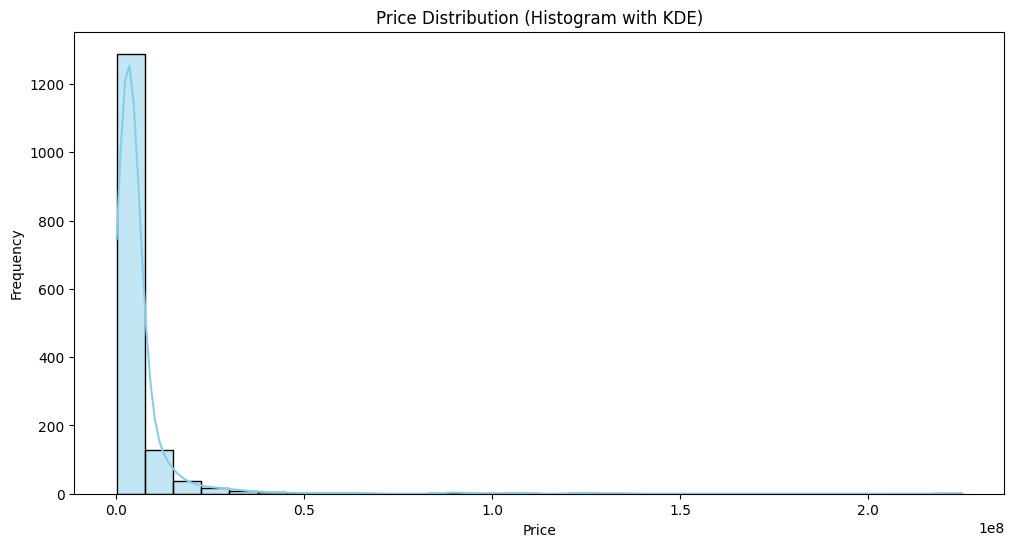

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True, color='skyblue', bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution (Histogram with KDE)')
plt.show()

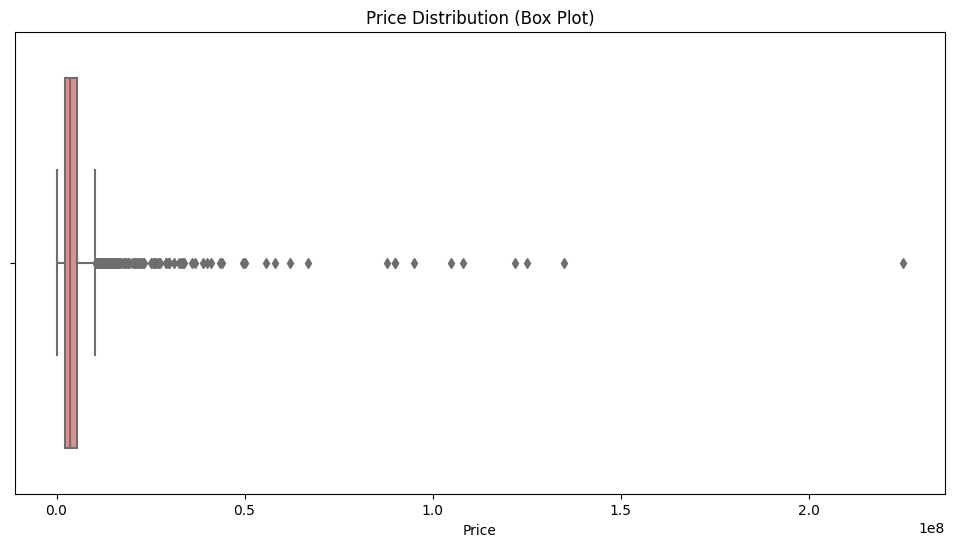

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'], color='lightcoral')
plt.xlabel('Price')
plt.title('Price Distribution (Box Plot)')
plt.show()

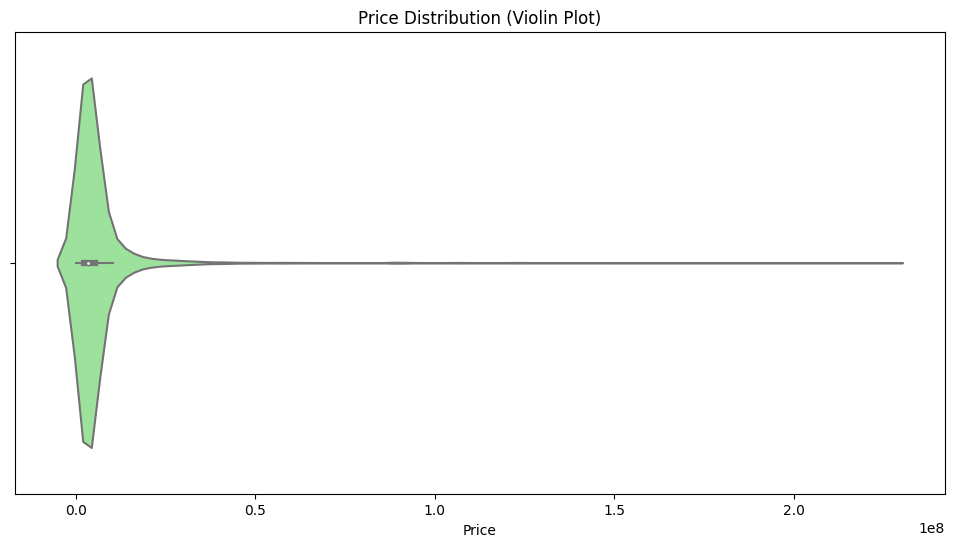

In [88]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Price'], color='lightgreen')
plt.xlabel('Price')
plt.title('Price Distribution (Violin Plot)')
plt.show()

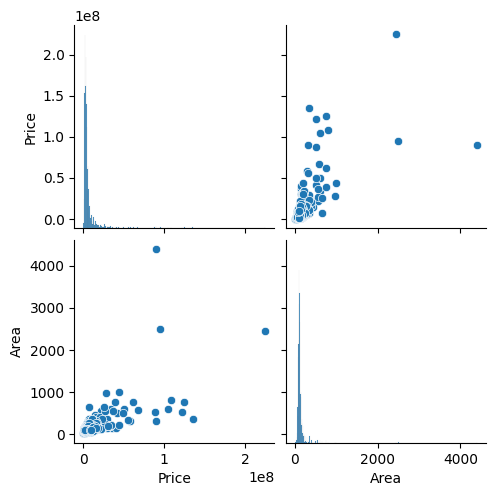

In [89]:
sns.pairplot(df[['Price', 'Area']])  # Örneğin 'Area' kolonu ile ilişkisini görselleştirmek
plt.show()

# Regression Hesaplama 

In [90]:
x=df.drop('Price',axis=1)
y=df[['Price']]

x.shape,y.shape

((1500, 2), (1500, 1))

In [91]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.metrics import mean_squared_error ,r2_score
import warnings
warnings.filterwarnings('ignore')

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Sonuçları saklamak için bir DataFrame oluştur
results = pd.DataFrame(columns=['Model', 'MSE', 'R^2'])

# Her model için eğitim yap ve değerlendirme metriklerini hesapla
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Sonuçları DataFrame'ye ekle
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'MSE': [mse], 'R^2': [r2]})], ignore_index=True)


In [93]:
results

,Model,MSE,R^2
0,Linear Regression,8.318925e+13,0.498091
1,Ridge Regression,8.318983e+13,0.498088
2,Lasso Regression,8.318925e+13,0.498091


In [94]:
from regression_func import algo_test 
algo_test(x,y)

,R_Squared,RMSE,MAE
AdaBoost,5.358935e-01,8.770616e+06,3.849732e+06
Linear,4.980914e-01,9.120814e+06,3.874562e+06
Lasso,4.980914e-01,9.120814e+06,3.874562e+06
Ridge,4.980879e-01,9.120846e+06,3.874351e+06
ElasticNet,4.957031e-01,9.142489e+06,3.811194e+06
KNeighborsRegressor,4.683957e-01,9.386756e+06,4.239497e+06
XGBRegressor,2.959420e-01,1.080253e+07,3.944896e+06
Gradient Boosting,9.488005e-02,1.224826e+07,4.355045e+06
SVR,-6.963733e-02,1.331495e+07,4.645343e+06
mlp_regressor,-2.828420e-01,1.458169e+07,6.868187e+06


# R^2 68 bulduk her halde bu en iyi değer olabilir ,
normalde burada durmak gerekiyor ama bizden deeplarning te uygulamamız lazım bence verimiz hem az parametre hemde düzgün bir dağılmıa sahip olmadığı için yanlış değerlendirmeye yol açabilir deeplarning için 
ama eğer veriler manüpüle edersek doğruluk oranı artacaktır 

tabi çektiğimiz veriler %100 gerçek veriler olduğu için manüpüle edincede 
doğruyu yanstımıyacağını düşünüyorum , yani kısaca başka bir yöntem bulunmalı ve ya Yaptığım veri çekme işlemi farklı sitelerden daha fazala parametre alınarak değerlendirilmeli .

In [95]:
df.head()

,Room Count,Area,Price
0,3,95,1390000
1,3,90,3650000
2,3,90,5650000
3,3,120,3000000
4,4,115,3840000


<Axes: >

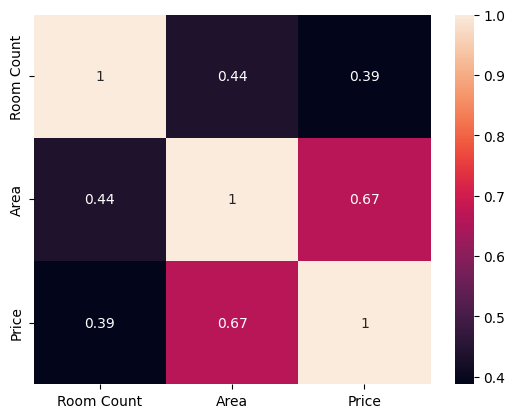

In [96]:
import seaborn as sns 
#sns.heatmap(df.corr(Numeric), annot=True, cmap='coolwarm', fmt='.2f')
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [97]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Veriyi hazırlama
X = df.drop('Price', axis=1)
y = df['Price']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımlama
model = KNeighborsRegressor(n_neighbors=5)  # n_neighbors değeri, KNN'nin kaç komşu kullanacağını belirler
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R^2: {r2}')


MSE: 76923707331558.61
R^2: 0.5358934930049214


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


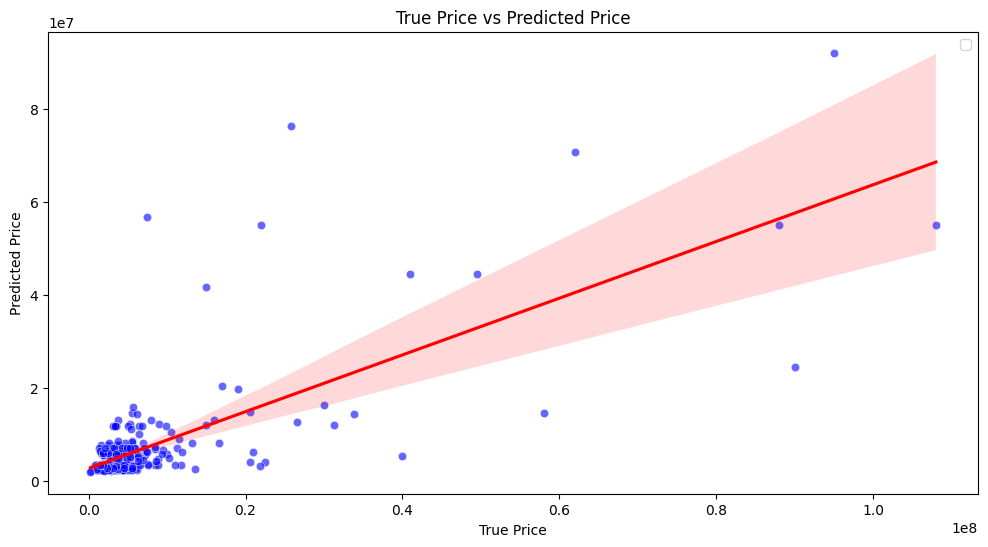

In [98]:
import numpy as np
import seaborn as sns

# Scatter plot için verileri hazırlama
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)

# Regresyon doğrusunu çizme
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'label': 'Regression Line'})

plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs Predicted Price')
plt.legend()
plt.show()


## DeepLearning

In [99]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verileri ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeli tanımlama
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Çıkış katmanı
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
model.fit(X_train, y_train, epochs=10, batch_size=150, validation_split=0.1, verbose=1)

# Modeli değerlendirme
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 173303725555712.0000 - val_loss: 195327881641984.0000
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 170543722528768.0000 - val_loss: 195327881641984.0000
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 113671225212928.0000 - val_loss: 195327881641984.0000
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 183863691182080.0000 - val_loss: 195327881641984.0000
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 164849854185472.0000 - val_loss: 195327848087552.0000
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 111883814174720.0000 - val_loss: 195327814533120.0000
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 117016543363072.0000 - val_loss: 195327814533120.0000
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 215314780389376.0000 - val_loss: 195327814533120.0000
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 166520948785152.0000 - val_loss: 195327814533120.0000
Epoch 10/

In [100]:
y_pred = model.predict(X_test)

# R^2 değerini hesaplama
r2 = r2_score(y_test, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [101]:
r2  # Yani deeep larninge uygun değil 

-0.28578585684589997

### Kısmen de olsa amacımızıa ulaştık R^2 değeri ile , tabi bu modelli dahada geliştirmek yeni yeni yöntemler ve çözümlemeler bulmak gerekiyor 
inşallah ilerde daha iyi çzümlemeler yapabilirim